<a href="https://colab.research.google.com/github/anjali481/Image/blob/main/using_xgboost_to_predict_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [ ]:
dataset=pd.read_csv("diabetes.csv")

In [ ]:
dataset.shape

(768, 9)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
dataset.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1.0,106,76,29.15342,125.0,37.5,0.197,26,0
759,6.0,190,92,29.15342,125.0,35.5,0.278,66,1
760,2.0,88,58,26.00000,16.0,28.4,0.766,22,0
761,9.0,170,74,31.00000,125.0,44.0,0.403,43,1
762,9.0,89,62,29.15342,125.0,22.5,0.142,33,0
763,10.0,101,76,48.00000,180.0,32.9,0.171,63,0
764,2.0,122,70,27.00000,125.0,36.8,0.340,27,0
765,5.0,121,72,23.00000,112.0,26.2,0.245,30,0
766,1.0,126,60,29.15342,125.0,30.1,0.349,47,1
767,1.0,93,70,31.00000,125.0,30.4,0.315,23,0


In [ ]:
dataset.isnull().values.any()

False

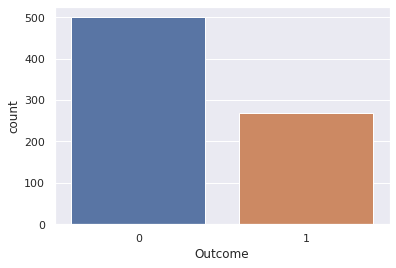

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Outcome", data=dataset)

In [ ]:
dataset['Insulin']==0

dataset['Insulin'] = dataset['Insulin'].replace(0, np.nan)
dataset['Insulin'].fillna(dataset['Insulin'].mean(), inplace=True)
dataset['Insulin']

0      125.0
1      125.0
2      125.0
3       94.0
4      168.0
       ...  
763    180.0
764    125.0
765    112.0
766    125.0
767    125.0
Name: Insulin, Length: 768, dtype: float64

In [ ]:
dataset['SkinThickness']==0
dataset['Pregnancies']==0
dataset['Pregnancies'] = dataset['Pregnancies'].replace(0, np.nan)
dataset['Pregnancies'].fillna(dataset['Pregnancies'].mean(), inplace=True)


dataset['SkinThickness'].fillna(dataset['SkinThickness'].mean(), inplace=True)
dataset['SkinThickness'] = dataset['SkinThickness'].replace(0, np.nan)
dataset['SkinThickness']

0      35.00000
1      29.00000
2      29.15342
3      23.00000
4      35.00000
         ...   
763    48.00000
764    27.00000
765    23.00000
766    29.15342
767    31.00000
Name: SkinThickness, Length: 768, dtype: float64

In [ ]:
corr=dataset.corr()

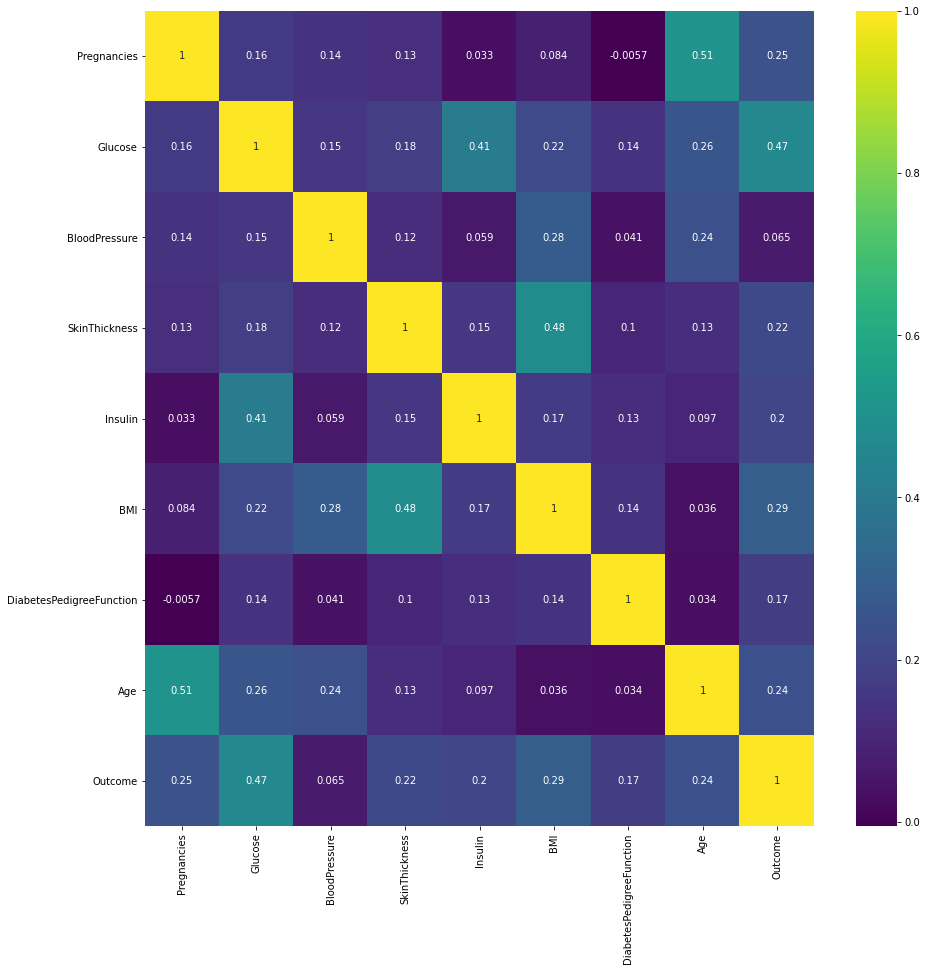

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,15))

sns.heatmap(corr,annot=True,cmap="viridis")


In [ ]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

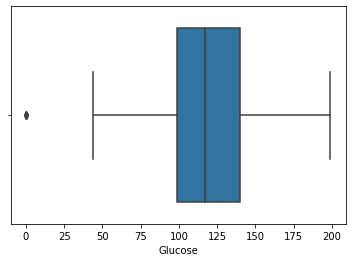

In [ ]:

sns.boxplot(x=dataset['Glucose'])

In [ ]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                  4.0000
Glucose                     41.2500
BloodPressure               18.0000
SkinThickness                7.0000
Insulin                      5.7500
BMI                          9.3000
DiabetesPedigreeFunction     0.3825
Age                         17.0000
Outcome                      1.0000
dtype: float64


In [ ]:
(dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False
4,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,True,True,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,True,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [ ]:
x=dataset.drop(["Outcome"],axis=1)
y=dataset["Outcome"]

In [ ]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
from sklearn.impute import SimpleImputer



In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7207792207792207


In [ ]:
import xgboost as xgb


In [ ]:
xgb_classifier = xgb.XGBClassifier()

In [ ]:

from sklearn.metrics import confusion_matrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
gbm = xgb.XGBClassifier(max_depth=4, n_estimators=300, learning_rate=0.03).fit(X_train, y_train)
predictions = gbm.predict(X_test)

In [ ]:
predictions    # predictions of the diabets

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

Let us use some other techniques like xgboost and random forest ,decision tree


In [ ]:
#first create a function

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
def res(model,X_train,X_test,y_train,y_test):
  pred_y_train=model.predict(X_train)
  pred_y_test=model.predict(X_test)

  clf_report = pd.DataFrame(classification_report(y_train,pred_y_train, output_dict=True))
  print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, pred_y_train)}")
  print(f"ACCURACY SCORE:\n{accuracy_score(y_train,pred_y_train ):.4f}")
  print(f"CLASSIFICATION REPORT:\n{clf_report}")
  print(f"ACCURACY SCORE:\n{accuracy_score(y_test, pred_y_test):.4f}")

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(X_train, y_train)
res(grad_boost_clf, X_train, X_test, y_train, y_test)

CONFUSION MATRIX:
[[396   8]
 [ 34 176]]
ACCURACY SCORE:
0.9316
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.920930    0.956522  0.931596    0.938726      0.933103
recall       0.980198    0.838095  0.931596    0.909147      0.931596
f1-score     0.949640    0.893401  0.931596    0.921521      0.930405
support    404.000000  210.000000  0.931596  614.000000    614.000000
ACCURACY SCORE:
0.7273


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)
bagging_clf.fit(X_train, y_train)

res(bagging_clf, X_train, X_test, y_train, y_test)

CONFUSION MATRIX:
[[404   0]
 [  0 210]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    404.0  210.0       1.0      614.0         614.0
ACCURACY SCORE:
0.7403
